# Bloch sphere Qiskit example 

## 1. Bloch sphere from state vector

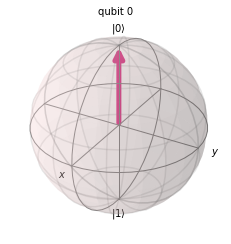

In [24]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

#state = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
state = Statevector([1, 0])
plot_bloch_multivector(state)


## 2. Simple quantum circuit and gates

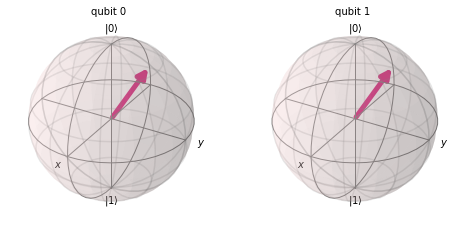

In [47]:

qc = QuantumCircuit(2,2) # 1 quantum and 1 classical bit (calssical bt for storing later measurement results)
a  = 0.8
b = -0.6
#a= 1/np.sqrt(2)
#b= 1/np.sqrt(2)
#qc.initialize([a*a, a*b, b*a, b*b], [0,1]) #set initial state

#quantum gates
#qc.z(1) # Pauli X gate
#qc.y(0) # Pauli Y gate
#qc.z(0) # Pauli Z gate
#qc.h(1) # H gate
qc.x(1)
qc.x(1)
#qc.h(1)
#phase gate
#theta = np.pi
#qc.p(theta, 0)
state = Statevector(qc)
#print(state)
#qc.draw()
#state2 = Statevector([0, 1])
plot_bloch_multivector(state)


## 3.Measurement

In [48]:


qc.measure([0,1],[0,1]) #what qubits to measure and where to write the result
qc.draw() #draw the circuit

┌────────────────────────────────────┐     ┌─┐        
q_0: ┤0                                   ├─────┤M├────────
     │  Initialize(0.64,-0.48,-0.48,0.36) │┌───┐└╥┘┌───┐┌─┐
q_1: ┤1                                   ├┤ X ├─╫─┤ X ├┤M├
     └────────────────────────────────────┘└───┘ ║ └───┘└╥┘
c: 2/════════════════════════════════════════════╩═══════╩═
                                                 0       1

### Simulating measurement results

In [6]:
from qiskit_aer import Aer
from qiskit import transpile

#select simulator
backend = Aer.get_backend('qasm_simulator')
job_sim = backend.run(transpile(qc, backend), shots=1000) #repeat 1000 times to get statistics

result_sim = job_sim.result() 

counts = result_sim.get_counts()
print(counts) #write out the results

{'1': 502, '0': 498}


### Visualizing measurement results

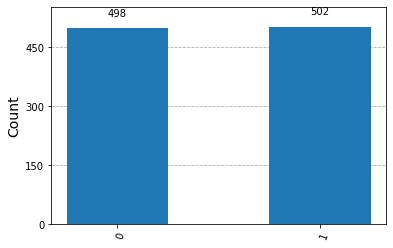

In [7]:
from qiskit.visualization import plot_histogram

#histogram from results
plot_histogram(counts)